In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sheets_dict = pd.read_excel('bode1/EVOCARD.xlsx', sheet_name=None)

In [3]:
for sheet_name, df in sheets_dict.items():
    if sheet_name == 'CARD_FACT':
        fact_df = df.copy()
    elif sheet_name == "CARD_DIM":
        dim_df =  df.copy()


In [4]:
fact_df.to_csv("fact.csv", index=False)
dim_df.to_csv("dim.csv", index=False)

In [49]:
fact_df.describe()

,NET_CASH_FLOW_AMT_LCY,TXN_SRC_ID
count,1.943800e+04,1.180900e+04
mean,1.173832e+06,3.510026e+08
std,4.251359e+06,3.579121e+07
min,0.000000e+00,2.705736e+08
25%,4.700000e+04,3.194605e+08
50%,1.440000e+05,3.538664e+08
75%,5.000000e+05,3.805599e+08
max,5.090886e+07,4.107720e+08


In [50]:
dim_df.describe()

,CREDIT_LIMIT
count,1.100000e+02
mean,3.265455e+07
std,2.199518e+07
min,5.000000e+06
25%,1.800000e+07
50%,3.000000e+07
75%,4.975000e+07
max,2.000000e+08


In [51]:
fact_df.head()

,CIF hash,CARD_NBR hash,TXN_TM,TML_WEB_AP_NM,DSC,NET_CASH_FLOW_AMT_LCY,TXN_SRC_ID,CARD_CLASSCIFICATION
0,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-05-22 08:51:55,OPTP0000,MOMO VN 1900545441 704,512200.0,270597152.0,VC
1,0828e14ddfd5dcfe9b2fc7a54eeba5f8,f0b80252f29a51ae72a1e4a259ca6857824f00e62cc868...,2022-05-22 17:50:35,OPTP0000,WCM_VINMART_6155_NGUYENXI NGHE AN 704,188611.0,270710131.0,VC
2,0828e14ddfd5dcfe9b2fc7a54eeba5f8,f0b80252f29a51ae72a1e4a259ca6857824f00e62cc868...,2022-05-22 15:39:27,OPTP0000,WCM_VINMART_6155_NGUYENXI NGHE AN 704,13300.0,270677082.0,VC
3,895db5780821af47717c3447e8ced28c,a42fc5e25c28e04f0bda644d552a5d444cfbb6c036155a...,2022-11-20 22:20:49,OPTP0000,VNPAY*HNPMC514 Q HAI BA TRUN 704,90000.0,321780907.0,VC
4,621622e23117bf891052887aa0e9f6f6,d8fee6aaeb16d1a4c2d753fb4900a2d6b6ed6f7ead6b94...,2022-11-20 00:00:00,OPTP0000,CON CUNG HCM-317 HOANG DI HCM 704 00000,2000000.0,NaN,VC


In [52]:
dim_df.head()

,CIF hash,CARD_NBR hash,CREDIT_LIMIT
0,8be1cf5b2f6631bb1ac59870f7f669a6,30301079b6939d5d023e1e8c0dd4cc1e3afdfbcf71c76d...,16000000
1,4245fc82e1c81cecfc821752609a8289,7bc66484f2e2db4c181a076a11450b7d0359478c57dd21...,20000000
2,24dc185ddc00fdbe7a3519e5a3bb2c12,ef3100c465a27ebfbbb714535de2a3441ad952eff3f6d2...,49000000
3,0340ab3837f34a1aa87d5b5a8a25a07e,8a310933f4b7f835b19a0a8a2ab43ef865e49111d3fb0a...,17000000
4,87d7997fd71709aad458a1b3b9c77e33,3aed5f483b3f8fd580f979313770e06f7252c4a480d866...,23000000


<Figure size 1200x800 with 0 Axes>

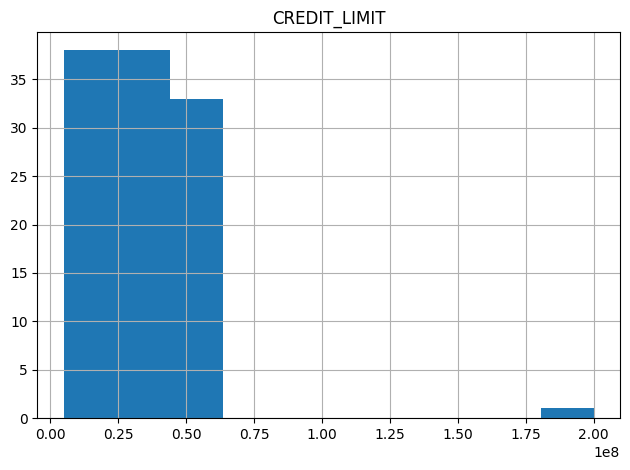

In [53]:
plt.figure(figsize=(12,8))
dim_df.hist()
plt.tight_layout()
plt.show()

In [54]:
dim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CIF hash       110 non-null    object
 1   CARD_NBR hash  110 non-null    object
 2   CREDIT_LIMIT   110 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [55]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19561 entries, 0 to 19560
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CIF hash               19561 non-null  object 
 1   CARD_NBR hash          19561 non-null  object 
 2   TXN_TM                 19561 non-null  object 
 3   TML_WEB_AP_NM          19561 non-null  object 
 4   DSC                    19246 non-null  object 
 5   NET_CASH_FLOW_AMT_LCY  19438 non-null  float64
 6   TXN_SRC_ID             11809 non-null  float64
 7   CARD_CLASSCIFICATION   19561 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


In [56]:
merged_df = pd.merge(fact_df, dim_df, on=['CIF hash', 'CARD_NBR hash'], how="outer", suffixes=('_left','_right'))

In [57]:
merged_df.tail()

,CIF hash,CARD_NBR hash,TXN_TM,TML_WEB_AP_NM,DSC,NET_CASH_FLOW_AMT_LCY,TXN_SRC_ID,CARD_CLASSCIFICATION,CREDIT_LIMIT
19556,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-06-16 07:17:29,OPTP0119,NaN,NaN,NaN,VC,30000000
19557,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-07-31 00:00:00,OPTP0000,THAKRAL ONE -NGUYEN TRUON HCM 704 00000,900000.0,NaN,VC,30000000
19558,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-07-29 00:00:00,OPTP0000,SIEU THI LUXY HCM 704 10000,766000.0,NaN,VC,30000000
19559,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-07-29 18:46:45,OPTP0000,SIEU THI LUXY Q BINH THANH 704,766000.0,402337506.0,VC,30000000
19560,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-07-31 11:10:32,OPTP0000,THAKRAL ONE -NGUYEN TRUON HCM 704,900000.0,402804856.0,VC,30000000


In [58]:
merged_df["CIF hash"].value_counts()

CIF hash
7e9c172d235c590cbe8eb74b1489b7c8    1926
c7896c69fd34a4a28f5d22d78bb4b663    1280
8b0cd88c599475377a006f9535233825     859
815e4858d422f45f27ff703fce8acfed     802
ef6af2ae19ebeed14db05a8a262ac7de     785
                                    ... 
8452ec5e9124dae1ad41d6909f5e012b      15
a2f5bfe400cca23d376d49f5e6d4d49f      11
b08b398d3bafef2842025166e0085652       8
7789da1193b1a05eefa52f0d8fa70257       6
edde34acffa781f54d40dd73253b3e35       6
Name: count, Length: 110, dtype: int64

In [59]:
fact_df["CIF hash"].value_counts()

CIF hash
7e9c172d235c590cbe8eb74b1489b7c8    1926
c7896c69fd34a4a28f5d22d78bb4b663    1280
8b0cd88c599475377a006f9535233825     859
815e4858d422f45f27ff703fce8acfed     802
ef6af2ae19ebeed14db05a8a262ac7de     785
                                    ... 
8452ec5e9124dae1ad41d6909f5e012b      15
a2f5bfe400cca23d376d49f5e6d4d49f      11
b08b398d3bafef2842025166e0085652       8
7789da1193b1a05eefa52f0d8fa70257       6
edde34acffa781f54d40dd73253b3e35       6
Name: count, Length: 110, dtype: int64

In [60]:
merged_df[merged_df["CIF hash"]=="7e9c172d235c590cbe8eb74b1489b7c8"]["TXN_TM"]

6260    2023-02-10 00:00:00
6261    2023-02-10 00:00:00
6262    2023-02-11 00:00:00
6263    2023-02-11 00:00:00
6264    2023-02-11 01:28:08
               ...         
8181    2023-04-20 12:34:27
8182    2023-05-08 11:50:04
8183    2023-05-08 00:00:00
8184    2023-08-18 23:48:49
8185    2023-08-04 18:41:14
Name: TXN_TM, Length: 1926, dtype: object

In [61]:
merged_df['TXN_TM'] = pd.to_datetime(merged_df['TXN_TM'])


In [82]:
def split_period_time(df, time_col):
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month

    # Create a mask for rows where date falls between 22nd of one month and 21st of the next month
    mask = ((df[time_col].dt.day >= 22) & (df[time_col].dt.month == df['month'])) | \
        ((df[time_col].dt.day <= 21) & (df[time_col].dt.month == df['month'] + 1))
    interval_1 = df[mask]
    interval_2 = df[~mask]
    return interval_1, interval_2

In [83]:
in_debt_time_next_month, _ = split_period_time(merged_df, 'TXN_TM')

In [101]:
in_debt_time_next_month["TXN_SRC_ID"].isna().value_counts()
valid_in_debt_time_next_month = in_debt_time_next_month[~in_debt_time_next_month["TXN_SRC_ID"].isna()]
print(in_debt_time_next_month.shape, valid_in_debt_time_next_month.shape)

(5590, 11) (3444, 11)


In [91]:
# valid_in_debt_time_next_month.where(valid_in_debt_time_next_month["TML_WEB_AP_NM"] in ["OPTP0000", "OPTP0119"]).groupby('CARD_NBR hash').agg({'NET_CASH_FLOW_AMT_LCY': 'sum'})
def calculate_sum_debt_in_time(df: pd.DataFrame):
    df = df.where((df["TML_WEB_AP_NM"] == "OPTP0000") | (df["TML_WEB_AP_NM"] == "OPTP0119"))
    return df.groupby('CARD_NBR hash').agg({'NET_CASH_FLOW_AMT_LCY': 'sum'})
    

In [93]:
calculate_sum_debt_in_time(valid_in_debt_time_next_month).loc[:, "NET_CASH_FLOW_AMT_LCY"]

CARD_NBR hash
00b665c97333b0efd338b204f31ab18b18858dc0ec597bf7a2732b810f5a6012    12145965.0
01e1df72ab754aba55b6f56c238d96c8d767aeac3ff6fcd5e5f8c7a2ddd06d2c    27057016.0
0693d33c6f190387dc1cc91eb97d6cfb41dbd90405d4d90f3d23a69b0890bc1f    28375179.0
093cd5a7de80aec3a44e423f36f9da99559bdfe7fc3c4bb8b9bb1291ad1e8f51    25732311.0
0aab888f988c63dc1fb70a5a24c3255dce1ca40fb3d2dab9defe2abaace49741     7301582.0
                                                                       ...    
fa591526edb41ed3c7ceaf861e3e027be029ebeba0c3d58682b8cb5833cbe49c     1979346.0
fb95c2ecb85ba1abc8f35052e3aa848ffaffc3fdaab3339c31bb9df98cb98b16    20000000.0
fc940f73e1b6521c76738324aad88dd99511687706427883c8e6a2b0a896916a     7796030.0
fddd87622ba07539c2b1a1689ce4fa67725ceda0e70fdb8bed491ac4ac6dec44     6825701.0
fee9c68bd0b8c7d48f8f895731dba865684705c42b98897334c3f9422d717c0f     2007099.0
Name: NET_CASH_FLOW_AMT_LCY, Length: 100, dtype: float64

In [98]:
dim_df.loc[dim_df['CARD_NBR hash'] == "00b665c97333b0efd338b204f31ab18b18858dc0ec597bf7a2732b810f5a6012", 'CREDIT_LIMIT'].iloc[0]

9000000

In [97]:
dim_df.head

<bound method NDFrame.head of                              CIF hash  \
0    8be1cf5b2f6631bb1ac59870f7f669a6   
1    4245fc82e1c81cecfc821752609a8289   
2    24dc185ddc00fdbe7a3519e5a3bb2c12   
3    0340ab3837f34a1aa87d5b5a8a25a07e   
4    87d7997fd71709aad458a1b3b9c77e33   
..                                ...   
105  b2e47148bfa8e1e67bcc41835bfdd76b   
106  ce35d9f395952dc704ed3f4530668233   
107  d36cd719ff87d856c50135ad59bafae4   
108  05a6d37e7ea9a73c5343618218d0ddc6   
109  2cb3fc60ab6a9f230f115fa07eb7d686   

                                         CARD_NBR hash  CREDIT_LIMIT  
0    30301079b6939d5d023e1e8c0dd4cc1e3afdfbcf71c76d...      16000000  
1    7bc66484f2e2db4c181a076a11450b7d0359478c57dd21...      20000000  
2    ef3100c465a27ebfbbb714535de2a3441ad952eff3f6d2...      49000000  
3    8a310933f4b7f835b19a0a8a2ab43ef865e49111d3fb0a...      17000000  
4    3aed5f483b3f8fd580f979313770e06f7252c4a480d866...      23000000  
..                                                 

In [102]:
valid_in_debt_time_next_month.where((valid_in_debt_time_next_month["TML_WEB_AP_NM"] == "OPTP0000") | (valid_in_debt_time_next_month["TML_WEB_AP_NM"] == "OPTP0119"))


,CIF hash,CARD_NBR hash,TXN_TM,TML_WEB_AP_NM,DSC,NET_CASH_FLOW_AMT_LCY,TXN_SRC_ID,CARD_CLASSCIFICATION,CREDIT_LIMIT,year,month
0,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-05-22 08:51:55,OPTP0000,MOMO VN 1900545441 704,512200.0,270597152.0,VC,11000000.0,2022.0,5.0
11,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-09-24 22:48:54,OPTP0000,MOMO VN 1900545441 704,104200.0,304871879.0,VC,11000000.0,2022.0,9.0
12,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-09-24 10:54:34,OPTP0000,MOMO VN 1900545441 704,512200.0,304665707.0,VC,11000000.0,2022.0,9.0
16,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-09-28 06:30:41,OPTP0000,MOMO VN 1900545441 704,53200.0,305742119.0,VC,11000000.0,2022.0,9.0
21,0deb82c7391489aa02c771fec3b67f0f,41874f1bdd5736ee9e3c884326e3137839484f3ab3a86b...,2022-05-25 22:42:35,OPTP0000,MOMO VN 1900545441 704,53200.0,271548186.0,VC,11000000.0,2022.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19549,7789da1193b1a05eefa52f0d8fa70257,fb95c2ecb85ba1abc8f35052e3aa848ffaffc3fdaab333...,2023-05-31 16:31:55,OPTP0000,MPOS*VJ SHOP HO CHI MINH 704,20000000.0,381892784.0,VC,25000000.0,2023.0,5.0
19551,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19554,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19559,edde34acffa781f54d40dd73253b3e35,4ee4b831b42c7fe607fc01ce893764ef1cfff32761db44...,2023-07-29 18:46:45,OPTP0000,SIEU THI LUXY Q BINH THANH 704,766000.0,402337506.0,VC,30000000.0,2023.0,7.0


In [103]:
valid_in_debt_time_next_month.isna().sum()

CIF hash                 0
CARD_NBR hash            0
TXN_TM                   0
TML_WEB_AP_NM            0
DSC                      0
NET_CASH_FLOW_AMT_LCY    0
TXN_SRC_ID               0
CARD_CLASSCIFICATION     0
CREDIT_LIMIT             0
year                     0
month                    0
dtype: int64

In [104]:
fact_df.isna().sum()

CIF hash                    0
CARD_NBR hash               0
TXN_TM                      0
TML_WEB_AP_NM               0
DSC                       315
NET_CASH_FLOW_AMT_LCY     123
TXN_SRC_ID               7752
CARD_CLASSCIFICATION        0
dtype: int64

In [105]:
merged_df.isna().sum()

CIF hash                    0
CARD_NBR hash               0
TXN_TM                      0
TML_WEB_AP_NM               0
DSC                       315
NET_CASH_FLOW_AMT_LCY     123
TXN_SRC_ID               7752
CARD_CLASSCIFICATION        0
CREDIT_LIMIT                0
year                        0
month                       0
dtype: int64

In [111]:
# check how many card of one customer
distinct_counts = fact_df.groupby("CIF hash")['CARD_NBR hash'].nunique()
more_than_one_distinct = distinct_counts[distinct_counts > 1]
more_than_one_distinct

Series([], Name: CARD_NBR hash, dtype: int64)

In [119]:
# check if card is share by 2 customer
distinct_counts_reverse = dim_df.groupby("CARD_NBR hash")['CIF hash'].nunique()
print(distinct_counts_reverse)
more_than_one_distinct_reverse = distinct_counts_reverse[distinct_counts_reverse > 1]
more_than_one_distinct_reverse

CARD_NBR hash
00b665c97333b0efd338b204f31ab18b18858dc0ec597bf7a2732b810f5a6012    1
01e1df72ab754aba55b6f56c238d96c8d767aeac3ff6fcd5e5f8c7a2ddd06d2c    1
0693d33c6f190387dc1cc91eb97d6cfb41dbd90405d4d90f3d23a69b0890bc1f    1
093cd5a7de80aec3a44e423f36f9da99559bdfe7fc3c4bb8b9bb1291ad1e8f51    1
0aab888f988c63dc1fb70a5a24c3255dce1ca40fb3d2dab9defe2abaace49741    2
                                                                   ..
fb95c2ecb85ba1abc8f35052e3aa848ffaffc3fdaab3339c31bb9df98cb98b16    1
fc940f73e1b6521c76738324aad88dd99511687706427883c8e6a2b0a896916a    1
fddd87622ba07539c2b1a1689ce4fa67725ceda0e70fdb8bed491ac4ac6dec44    1
fde6a722ac2d1cc152f0193124de8937009d852896be0ba01385896c2bb8adc6    1
fee9c68bd0b8c7d48f8f895731dba865684705c42b98897334c3f9422d717c0f    1
Name: CIF hash, Length: 109, dtype: int64


CARD_NBR hash
0aab888f988c63dc1fb70a5a24c3255dce1ca40fb3d2dab9defe2abaace49741    2
Name: CIF hash, dtype: int64

In [120]:
dim_df.loc[dim_df['CARD_NBR hash'] == "0aab888f988c63dc1fb70a5a24c3255dce1ca40fb3d2dab9defe2abaace49741", 'CIF hash']

19    58335285c934594c182e5bd056d563f0
95    2ce974ffd7e04069b2b5d9419ee631ce
Name: CIF hash, dtype: object

In [121]:
dim_df['CARD_NBR hash'].nunique()

109

In [122]:
dim_df['CIF hash'].nunique()

110